**Using Individual Models**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6Dr8KRp5cBa72UJXBMoz0qkkSDk1zs95G26zlEZGHj-0iIUOhEmsg


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

**Load Images**

In [ ]:
images = "/content/drive/MyDrive/parkinsons t2/train"

In [ ]:
folders = os.listdir(images)
print(folders)

['pd', 'control']


In [ ]:
image_data= []
labels = []

In [ ]:
label_dict = {
    'control':0,
    'pd':1
}

In [ ]:
from keras.preprocessing import image

for ix in folders:
  path = os.path.join(images,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=((512,512)))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [ ]:
print(len(image_data),len(labels))

1040 1040


In [ ]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(1040, 512, 512, 3) (1040,)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(1040, 512, 512, 3) (1040, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

**Data Augmentation**

In [ ]:
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

**CNN_Model**

In [ ]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="parkinsons_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 64)       

In [ ]:
hist = model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 25,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/25
30/30 [==============================] - 6s 158ms/step - loss: 7.4224 - accuracy: 0.5011 - val_loss: 4.1097 - val_accuracy: 0.7885

Epoch 00001: val_loss improved from inf to 4.10966, saving model to parkinsons_detection.hdf5
Epoch 2/25
30/30 [==============================] - 4s 149ms/step - loss: 6.1054 - accuracy: 0.5470 - val_loss: 3.8812 - val_accuracy: 0.8462

Epoch 00002: val_loss improved from 4.10966 to 3.88121, saving model to parkinsons_detection.hdf5
Epoch 3/25
30/30 [==============================] - 4s 148ms/step - loss: 5.0958 - accuracy: 0.5630 - val_loss: 4.0396 - val_accuracy: 0.7308

Epoch 00003: val_loss did not improve from 3.88121
Epoch 4/25
30/30 [==============================] - 4s 148ms/step - loss: 4.5490 - accuracy: 0.6400 - val_loss: 4.0551 - val_accuracy: 0.6635

Epoch 00004: val_loss did not improve from 3.88121
Epoch 5/25
30/30 [==============================] - 5s 152ms/step - loss: 4.2442 - accuracy: 0.6613 - val_loss: 3.9595 - val_accuracy:

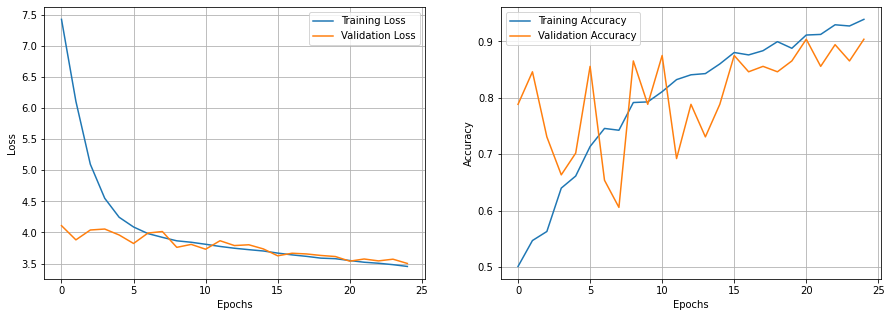

In [ ]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

**Testing CNN-Model performance**

In [ ]:
test_images = "/content/drive/MyDrive/parkinsons t2/test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'control':0,
    'pd':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)
    

['pd', 'control']
(100, 512, 512, 3) (100, 2)


In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 48ms/step - loss: 3.4463 - accuracy: 0.9600


[3.4462530612945557, 0.9599999785423279]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.94      0.98      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [ ]:
print(confusion_matrix(test_labels, pred))

[[47  3]
 [ 1 49]]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

**VGG16-Model**

In [ ]:
model_vgg = VGG16(include_top = False,weights = 'imagenet',input_shape = (512,512,3))

In [ ]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [ ]:
for ix in range(len(model_vgg.layers)):
    print(ix,model_vgg.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f14de66d750>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f14dcd585d0>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f14dcd44390>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f14dcd548d0>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f14dcd3da50>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f14dcbeefd0>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f14dc8fca10>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f14dd1d5c10>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f14dd2cd510>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f14dd1cec90>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f14dd2eaf10>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f16942dd9d0>
12 <tensorflow.python.ke

In [ ]:
for layer in model_vgg.layers[:15]:
    layer.trainable = False
for i, layer in enumerate(model_vgg.layers):
    print(i, layer.name, layer.trainable)
adam = Adam(learning_rate=0.00003)
model_vgg.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])
model_vgg.summary()

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0       

In [ ]:
av1 = Flatten()(model_vgg.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_new = Model(model_vgg.input,fc3)
model_new.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

In [ ]:
adam = Adam(learning_rate=0.00001)
model_new.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
filepath="parkinsons_detection_vgg16.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=2)
callbacks_list = [checkpoint]

In [ ]:
hist = model_new.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 20,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/20
30/30 [==============================] - 28s 897ms/step - loss: 7.8672 - accuracy: 0.6560 - val_loss: 6.8306 - val_accuracy: 0.8846

Epoch 00001: val_loss did not improve from 5.19399
Epoch 2/20
30/30 [==============================] - 26s 870ms/step - loss: 6.8995 - accuracy: 0.8077 - val_loss: 6.5575 - val_accuracy: 0.9038

Epoch 00002: val_loss did not improve from 5.19399
Epoch 3/20
30/30 [==============================] - 25s 835ms/step - loss: 6.4394 - accuracy: 0.9177 - val_loss: 6.2464 - val_accuracy: 0.9231

Epoch 00003: val_loss did not improve from 5.19399
Epoch 4/20
30/30 [==============================] - 26s 858ms/step - loss: 6.1051 - accuracy: 0.9519 - val_loss: 5.9503 - val_accuracy: 0.9712

Epoch 00004: val_loss did not improve from 5.19399
Epoch 5/20
30/30 [==============================] - 26s 873ms/step - loss: 5.8686 - accuracy: 0.9690 - val_loss: 5.7829 - val_accuracy: 0.9135

Epoch 00005: val_loss did not improve from 5.19399
Epoch 6/20
30/30 [=======

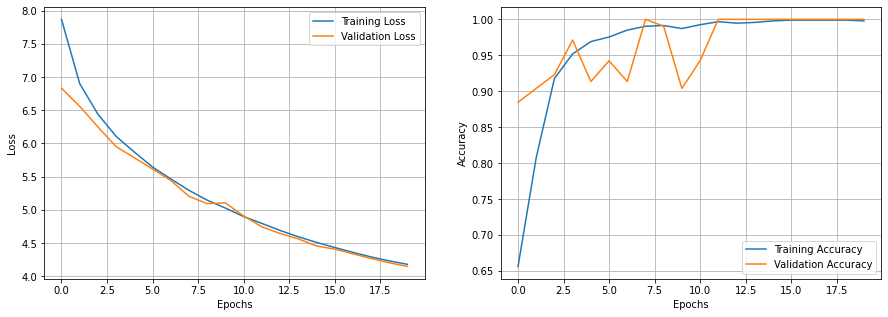

In [ ]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

**Testing_vgg16 performance**

In [ ]:
model_new.evaluate(x_test,y_test)

4/4 [==============================] - 2s 489ms/step - loss: 4.5016 - accuracy: 0.8700


[4.501593112945557, 0.8700000047683716]

In [ ]:
predictions = model_new.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        50
           1       1.00      0.74      0.85        50

    accuracy                           0.87       100
   macro avg       0.90      0.87      0.87       100
weighted avg       0.90      0.87      0.87       100



In [ ]:
print(confusion_matrix(test_labels, pred))

[[50  0]
 [13 37]]


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

**Resnet50-model**

In [ ]:
model = ResNet50(include_top = False,weights = 'imagenet',input_shape = (512,512,3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for ix in range(len(model.layers)):
    print(ix,model.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f12a7059090>
1 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f12a7059e10>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f12a7059b90>
3 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f14dcd44ed0>
4 <tensorflow.python.keras.layers.core.Activation object at 0x7f12a70ba390>
5 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f12a894fa50>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f12a7059b10>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f12a705d5d0>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f12a708bd90>
9 <tensorflow.python.keras.layers.core.Activation object at 0x7f12a70182d0>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f12a70598d0>
11 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization o

In [ ]:
for layer in model.layers[:169]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)
adam = Adam(learning_rate=0.00003)
model.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])
model.summary()

0 input_3 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
av1 = Flatten()(model.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_resnet = Model(model.input,fc3)
model_resnet.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
adam = Adam(learning_rate=0.00001)
model_resnet.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])

In [ ]:
filepath="parkinsons_detection_resnet50.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=2)
callbacks_list = [checkpoint]

In [ ]:
hist = model_resnet.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 20,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/20
30/30 [==============================] - 29s 742ms/step - loss: 7.5180 - accuracy: 0.6816 - val_loss: 6.9191 - val_accuracy: 0.4904

Epoch 00001: val_loss improved from inf to 6.91910, saving model to parkinsons_detection_resnet50.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
30/30 [==============================] - 20s 648ms/step - loss: 6.3958 - accuracy: 0.8397 - val_loss: 6.3788 - val_accuracy: 0.5577

Epoch 00002: val_loss improved from 6.91910 to 6.37875, saving model to parkinsons_detection_resnet50.hdf5
Epoch 3/20
30/30 [==============================] - 20s 671ms/step - loss: 5.7789 - accuracy: 0.9231 - val_loss: 5.5670 - val_accuracy: 0.9327

Epoch 00003: val_loss improved from 6.37875 to 5.56699, saving model to parkinsons_detection_resnet50.hdf5
Epoch 4/20
30/30 [==============================] - 19s 631ms/step - loss: 5.3518 - accuracy: 0.9594 - val_loss: 5.3940 - val_accuracy: 0.7885

Epoch 00004: val_loss improved from 5.56699 to 5.39401, saving model to parkinsons_detection_resnet50.hdf5
Epoch 5/20
30/30 [==============================] - 20s 664ms/step - loss: 5.0040 - accuracy: 0.9797 - val_loss: 4.9539 - val_accuracy: 0.9135

Epoch 00005: val_loss improved from 5.39401 to 4.95387, saving model to parkinsons_detection_resnet50.h

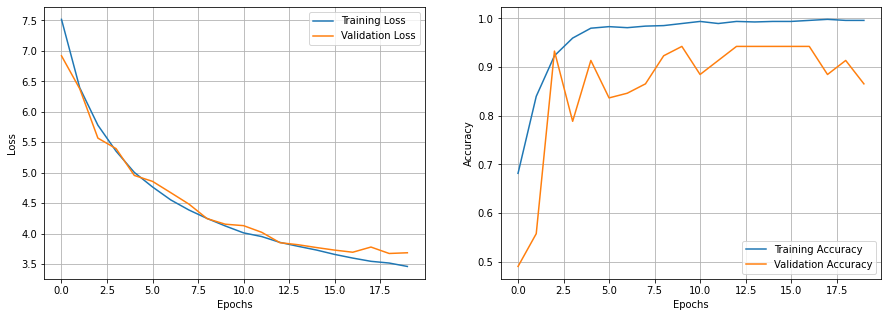

In [ ]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

**Testing Resnet50 Model**

In [ ]:
model_resnet.evaluate(x_test,y_test)

4/4 [==============================] - 3s 762ms/step - loss: 3.4417 - accuracy: 0.9800


[3.441673994064331, 0.9800000190734863]

In [ ]:
predictions = model_resnet.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
print(confusion_matrix(test_labels, pred))

[[50  0]
 [ 2 48]]
